# Iris Classification :

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd

# Dataset
dataset = pd.read_csv('iris.csv')
dataset.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [11]:
# Dataset information
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [12]:
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Dataset visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C765507860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002C7657AC390>]], dtype=object)

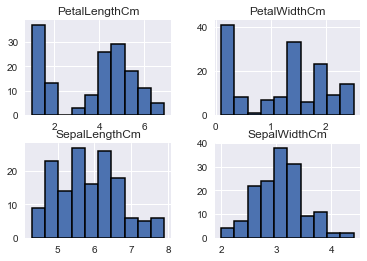

In [31]:
#Histogram
dataset.hist(edgecolor='black', linewidth=1.5)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C7658A9F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002C765953B38>]], dtype=object)

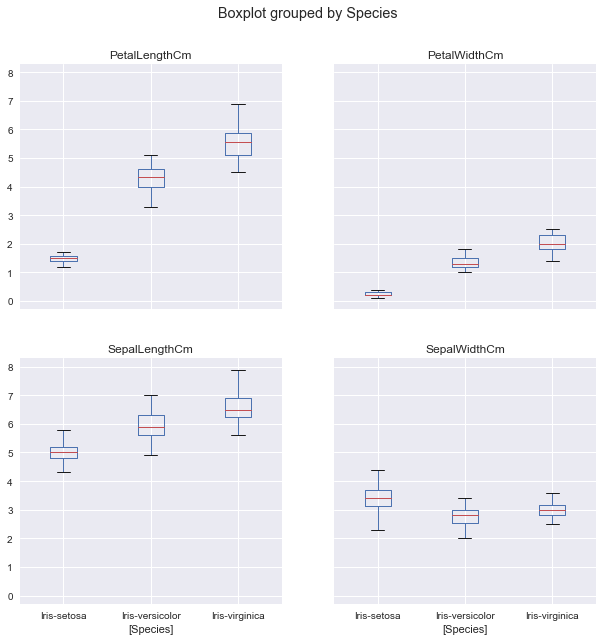

In [32]:
# Boxplot by species for each characteristics
dataset.boxplot(by="Species",figsize=(10,10))

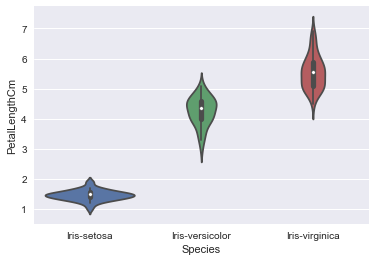

In [33]:
# Violin plots PetalLengthCm

sns.violinplot(data=dataset,x="Species", y="PetalLengthCm")


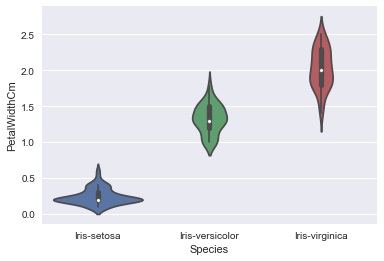

In [34]:
# Violin plots PetalLengthCm PetalWidthCm
sns.violinplot(data=dataset,x="Species", y="PetalWidthCm")

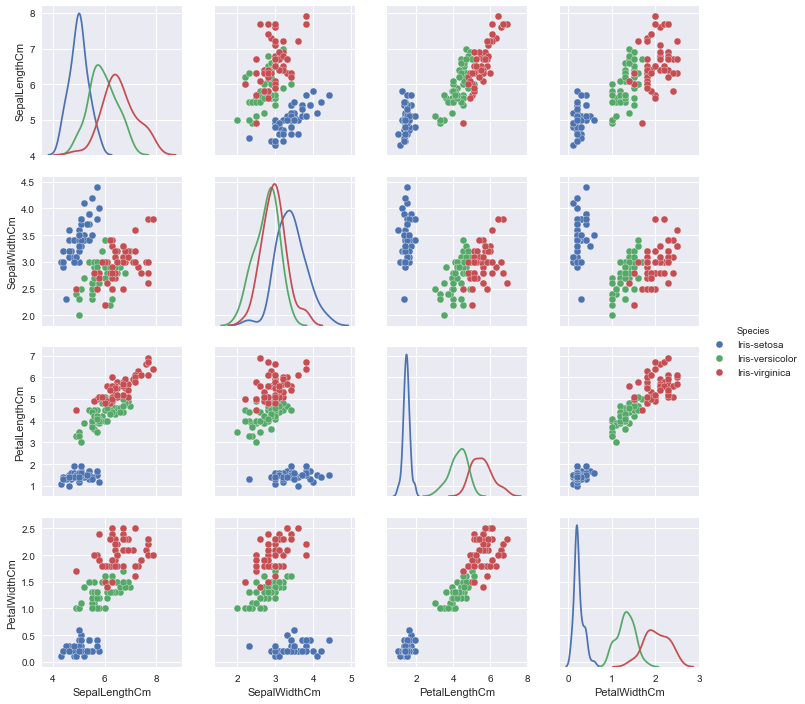

In [35]:
# Seaborn pairplot
sns.pairplot(dataset, hue="Species",diag_kind="kde")

The setosa is separated from the other two across all characteristics combinations.

## Classification models:


In [37]:
# Metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [53]:
# Seperating the data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# X = value 
# y = species 

In [48]:
# first thing before creating a model => Separate train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [54]:
# Summary of the predictions

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy (LogisticRegression) is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy (LogisticRegression) is 0.966666666667


In [60]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy 
print('Accuracy (Naive Bayes) is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy (Naive Bayes) is 0.966666666667


In [ ]:
#Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)